# Proyecto 04 - Modelando la Pandemia

  **En este proyecto vamos a estudiar y analizar los datos mundiales de la pandemia COVID-19 usando países modelo de distintas políticas públicas para luego interpretar otras curvas.**

**Importamos las librerias que vamos a utilizar.**

In [1]:
import warnings
import numpy as np
import pandas as pd
import pylab as plt
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns

In [2]:
warnings.filterwarnings("ignore")

**Los datos con los que vamos a trabajar los adquirimos del hub de Our World in Data.**

https://github.com/owid/covid-19-data/tree/master/public/data

**Este dataset que vamos a utilizar posee de features los cuales vamos a filtrar la mayoria, lo utilizamos por que nos va a servir para filtrar y por ende poder seleccionar mejor la politica para convatir el covid 19 en un rango de fechas donde podamos aislarla de otras politicas que se implementaron.Por ejemplo la vacunacion de la cuarentena, si mezclamos los datos esto sesgara los modelos y el analisis.**

In [3]:
dataset2=pd.read_csv("owid-covid-data (2).csv")
print(dataset2.shape)
print(dataset2.index)
print(dataset2.columns)
dataset2.head()

(135153, 67)
RangeIndex(start=0, stop=135153, step=1)
Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
print(dataset2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135153 entries, 0 to 135152
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    135153 non-null  object 
 1   continent                                   126536 non-null  object 
 2   location                                    135153 non-null  object 
 3   date                                        135153 non-null  object 
 4   total_cases                                 127687 non-null  float64
 5   new_cases                                   127684 non-null  float64
 6   new_cases_smoothed                          126642 non-null  float64
 7   total_deaths                                116482 non-null  float64
 8   new_deaths                                  116677 non-null  float64
 9   new_deaths_smoothed                         126642 non-null  float64
 

**Observamos los faltantes de cada columna.**

In [4]:
for col in dataset2.columns:
    nulos=dataset2[col].isna().sum()
    print(col, "{:.2f}%".format(nulos*100/135153))

iso_code 0.00%
continent 6.38%
location 0.00%
date 0.00%
total_cases 5.52%
new_cases 5.53%
new_cases_smoothed 6.30%
total_deaths 13.81%
new_deaths 13.67%
new_deaths_smoothed 6.30%
total_cases_per_million 6.01%
new_cases_per_million 6.01%
new_cases_smoothed_per_million 6.78%
total_deaths_per_million 14.29%
new_deaths_per_million 14.15%
new_deaths_smoothed_per_million 6.78%
reproduction_rate 22.32%
icu_patients 88.03%
icu_patients_per_million 88.03%
hosp_patients 85.98%
hosp_patients_per_million 85.98%
weekly_icu_admissions 99.00%
weekly_icu_admissions_per_million 99.00%
weekly_hosp_admissions 98.40%
weekly_hosp_admissions_per_million 98.40%
new_tests 58.46%
total_tests 58.20%
total_tests_per_thousand 58.20%
new_tests_per_thousand 58.46%
new_tests_smoothed 49.37%
new_tests_smoothed_per_thousand 49.37%
positive_rate 52.72%
tests_per_case 53.21%
tests_units 47.86%
total_vaccinations 74.38%
people_vaccinated 75.57%
people_fully_vaccinated 77.77%
total_boosters 95.03%
new_vaccinations 78.71%

**Vamos a observar los paises que se encuentran en el dataset.**

**Notamos tambien que hay instancias que se denominan, por ejemplo "High income", "Lower middle income", "European Union", "Europe", esto genera que haya muchos faltantes en datos sensibles para el analisis por lo que vamos a identificarlas y  eliminarlas, ya hemos identificado que se denominan OWID.**  

In [5]:
df2 = pd.DataFrame(dataset2.location.value_counts())
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
print(df2)

                                  location
Peru                              692     
Mexico                            692     
Argentina                         692     
Thailand                          689     
Taiwan                            677     
South Korea                       672     
North America                     671     
World                             671     
High income                       671     
Lower middle income               671     
China                             671     
Asia                              671     
United States                     671     
Upper middle income               671     
Japan                             671     
Hong Kong                         670     
European Union                    670     
Europe                            670     
Singapore                         670     
Vietnam                           670     
Malaysia                          669     
France                            669     
Nepal      

**Generamos un pequeño data set con las intancias que tenga OWID.**

In [6]:
dataset_OWID=dataset2[dataset2["iso_code"].str.contains("OWID")]
sum_OWID_NCases=dataset_OWID["new_cases"].sum()
sum_OWID_NCases

817817233.0

**Vemos cuales son los OWID que tenemos que eliminar.**

In [7]:
print(dataset_OWID.shape)
dataset_OWID["iso_code"].unique()

(9546, 67)


array(['OWID_AFR', 'OWID_ASI', 'OWID_EUR', 'OWID_EUN', 'OWID_HIC',
       'OWID_INT', 'OWID_KOS', 'OWID_LIC', 'OWID_LMC', 'OWID_NAM',
       'OWID_CYN', 'OWID_OCE', 'OWID_SAM', 'OWID_UMC', 'OWID_WRL'],
      dtype=object)

**Generamos un dataset que no contengan estos OWID, este data set es en el que vamos a trabajar.**

In [8]:
dataset_not_OWID=dataset2.set_index("iso_code")

In [9]:
dataset_not_OWID=dataset_not_OWID.drop([ 'OWID_WRL','OWID_AFR', 'OWID_ASI', 'OWID_EUR', 'OWID_EUN', 'OWID_HIC',
       'OWID_INT', 'OWID_KOS', 'OWID_LIC', 'OWID_LMC', 'OWID_NAM',
       'OWID_CYN', 'OWID_OCE', 'OWID_SAM', 'OWID_UMC'])

In [10]:
dataset_not_OWID.reset_index(inplace=True)

In [11]:
print(dataset_not_OWID.shape)
dataset_not_OWID.head()

(125607, 67)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [12]:
sum_not_OWID_NCases=dataset_not_OWID["new_cases"].sum()
sum_not_OWID_NCases

257394513.0

**Corroboramos que no quede ninguno**

In [13]:
dataset_not_OWID["iso_code"].unique()


array(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM',
       'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR',
       'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES', 'BIH', 'BWA',
       'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN',
       'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG',
       'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'COD',
       'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI',
       'EST', 'SWZ', 'ETH', 'FRO', 'FLK', 'FJI', 'FIN', 'FRA', 'PYF',
       'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD',
       'GTM', 'GGY', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN',
       'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA',
       'JAM', 'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'KIR', 'KWT', 'KGZ',
       'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX',
       'MAC', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MRT',
       'MUS', 'MEX',

**Observamos como quedo nuestro dataSet.**

In [14]:
dataset_not_OWID.shape

(125607, 67)

**Al haber tanta informacion, procedemos a eliminar todas las columnas que no vamos a utilizar.**

In [15]:
columnas_descartar= ['excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
                     'excess_mortality', 'excess_mortality_cumulative_per_million', 'human_development_index', 'life_expectancy' ,     
                     'female_smokers', 'male_smokers','handwashing_facilities','diabetes_prevalence', 'cardiovasc_death_rate', 'gdp_per_capita',
                     'extreme_poverty','aged_65_older','aged_70_older', 'new_people_vaccinated_smoothed',
                     'new_people_vaccinated_smoothed_per_hundred', 'new_vaccinations_smoothed_per_million','iso_code', 'continent',
                     'total_boosters', 'total_boosters_per_hundred','new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
                     'total_vaccinations','tests_per_case', 'tests_units','new_tests_smoothed', 'new_tests_smoothed_per_thousand',
                     'new_deaths_smoothed','new_cases_smoothed','new_cases_smoothed_per_million','new_deaths_smoothed_per_million',
                     'weekly_icu_admissions','weekly_icu_admissions_per_million', 'weekly_hosp_admissions','weekly_hosp_admissions_per_million',
                     "hospital_beds_per_thousand","total_tests_per_thousand","new_tests_per_thousand","people_vaccinated_per_hundred",
                     "people_fully_vaccinated_per_hundred","median_age","new_tests","total_tests","people_fully_vaccinated","new_vaccinations","total_deaths","icu_patients",
                     "new_deaths_per_million","total_deaths_per_million","new_cases_per_million","total_cases_per_million",
                     "hosp_patients_per_million", "icu_patients_per_million","total_deaths","icu_patients","hosp_patients","positive_rate"]
                    
dataset_covid  =dataset_not_OWID.drop(columns=columnas_descartar)
print(dataset_covid.shape)
dataset_covid.head()

(125607, 10)


,location,date,total_cases,new_cases,new_deaths,reproduction_rate,people_vaccinated,stringency_index,population,population_density
0,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,8.33,39835428.0,54.422
1,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,8.33,39835428.0,54.422
2,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,8.33,39835428.0,54.422
3,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,8.33,39835428.0,54.422
4,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,8.33,39835428.0,54.422


**Normalizamos las columnas que utilizaremos llevandolas a la escala de 100 mil por habitantes.**

In [16]:
def _population(fila):
    resultado=(fila["population"]/100000)
    return resultado

In [17]:
dataset_covid["population_per_100Thousand"]=dataset_covid.apply(_population,axis=1)

In [18]:
dataset_covid["total_cases_per_100Thousand"]=dataset_covid.apply(lambda row: row["total_cases"]/row['population']* 100000, axis=1)
dataset_covid["new_cases_per_100Thousand"]=dataset_covid.apply(lambda row: row["new_cases"]/row['population']* 100000, axis=1)
dataset_covid["new_deaths_per_100Thousand"]=dataset_covid.apply(lambda row: row["new_deaths"]/row['population']* 100000, axis=1)
dataset_covid["population_density_per_100Thousand"]=dataset_covid.apply(lambda row: row["population_density"]/100000, axis=1)

**Luego de convertidas, eliminamos las columnas originales.**

In [19]:
columnas_Descartar= ["population","total_cases","new_cases","new_deaths","population_density"]
dataset_covid =dataset_covid.drop(columns=columnas_Descartar)
print(dataset_covid.shape)
dataset_covid.head()

(125607, 10)


,location,date,reproduction_rate,people_vaccinated,stringency_index,population_per_100Thousand,total_cases_per_100Thousand,new_cases_per_100Thousand,new_deaths_per_100Thousand,population_density_per_100Thousand
0,Afghanistan,2020-02-24,NaN,NaN,8.33,398.35428,0.012552,0.012552,NaN,0.000544
1,Afghanistan,2020-02-25,NaN,NaN,8.33,398.35428,0.012552,0.000000,NaN,0.000544
2,Afghanistan,2020-02-26,NaN,NaN,8.33,398.35428,0.012552,0.000000,NaN,0.000544
3,Afghanistan,2020-02-27,NaN,NaN,8.33,398.35428,0.012552,0.000000,NaN,0.000544
4,Afghanistan,2020-02-28,NaN,NaN,8.33,398.35428,0.012552,0.000000,NaN,0.000544


**Observamos que hay muchas casos faltantes pero por ahora no nos vamos a ocupar ya que esto lo vamos a hacer dependiendo el periodo de tiempo y los paises que tomemos para analizar.**

In [20]:
for col in dataset_covid.columns:
    nulos=dataset_covid[col].isna().sum()
    print(col, "{:.2f}%".format(nulos*100/125607))

location 0.00%
date 0.00%
reproduction_rate 17.41%
people_vaccinated 76.97%
stringency_index 12.57%
population_per_100Thousand 0.00%
total_cases_per_100Thousand 5.69%
new_cases_per_100Thousand 5.70%
new_deaths_per_100Thousand 14.45%
population_density_per_100Thousand 3.66%


# ¿Cómo empezó la pandemia?

**Lo primero que haremos es observar la curva de contagios de 10 paises del norte, que es donde mas temprano de propago el virus.**

In [21]:
paises=dataset_covid['location'] #cargo el vector de paises
confirmados=dataset_covid['total_cases_per_100Thousand'] #carga vector todos los casos confirmados

In [22]:
lista_paises_norte=['Denmark','Sweden','United States','France','Canada','Germany','Finland','United Kingdom','Spain','Italy']

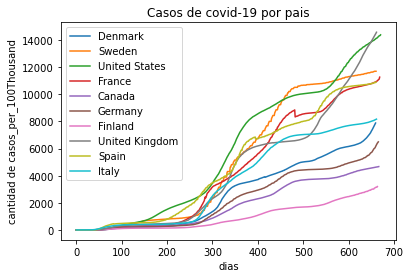

In [23]:
for i in lista_paises_norte:
    ind_=np.where(paises==i)
    ind_=ind_[0]
    casos_=confirmados[ind_]
    dias=np.arange(0,len(casos_))
    plt.plot(dias,casos_,label=i)
    plt.title("Casos de covid-19 por pais")
    plt.xlabel('dias')
    plt.ylabel('cantidad de casos_per_100Thousand')    
    plt.grid()
    plt.legend()
    
   

**Estas son las curvas de "casos totales por 100K habitantes" de los 10 paises seleccionados. Aquí no se ven las olas, ya que estas se ven en la curva de casos confirmados por día, es decir, de casos nuevos. Esta habla de los acumulados, entonces siempre se agregan.**

**Para ver mejor la curva, podemos tomar el logartimo de los datos. Una curva exponencial se ve lineal en escala logarítmica**


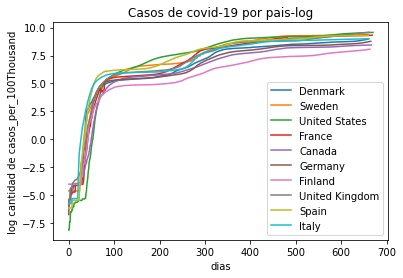

In [24]:
for i in lista_paises_norte:
    ind_=np.where(paises==i)
    ind_=ind_[0]
    casos_=confirmados[ind_]
    dias=np.arange(0,len(casos_))
    plt.plot(dias,np.log(casos_),label=i)
    plt.title("Casos de covid-19 por pais-log")
    plt.xlabel('dias')
    plt.ylabel('log cantidad de casos_per_100Thousand')
    plt.grid()
    plt.legend()

**Veamos lo que pasa en los primeros 90 días desde que se detectó el primer caso en estos paises, para ver cómo fue el $k$ inicial.**

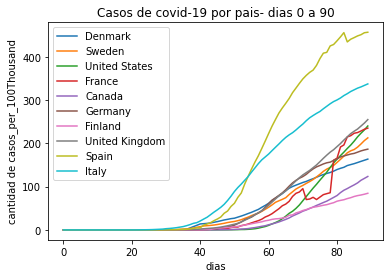

In [25]:
for i in lista_paises_norte:
    ind_=np.where(paises==i)
    ind_=ind_[0]
    casos_=confirmados[ind_]
    casos_principio=casos_[0:90]
    dias_principio=dias[0:90] 
    plt.plot(dias_principio,casos_principio,label=i)
    plt.title("Casos de covid-19 por pais- dias 0 a 90")
    plt.xlabel('dias')
    plt.ylabel('cantidad de casos_per_100Thousand')
    plt.grid()
    plt.legend()

**Es difícil determinar si estas partes son exponenciales. Analicemos qué pasa en escala logarítmica.**

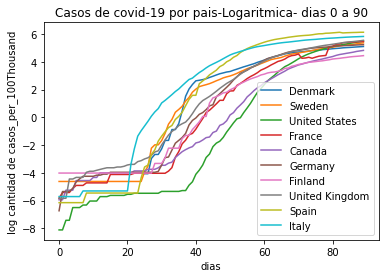

In [26]:
for i in lista_paises_norte:
    ind_=np.where(paises==i)
    ind_=ind_[0]
    casos_=confirmados[ind_]
    casos_principio=casos_[0:90]
    dias_principio=dias[0:90]
    plt.plot(dias_principio,np.log(casos_principio),label=i)
    plt.title("Casos de covid-19 por pais-Logaritmica- dias 0 a 90")
    plt.xlabel('dias')
    plt.ylabel('log cantidad de casos_per_100Thousand')
    plt.grid()
    plt.legend()

**Tomaremos diferentes periodos de tiempo para diferentes paises ya que ese fue el comportamiento más sostenido se da en tiempos diferentes en muchos de ellos.**

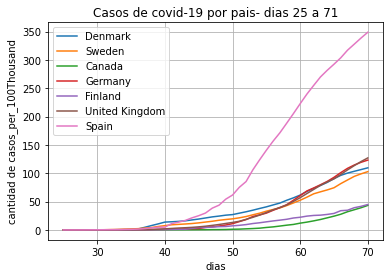

In [27]:
lista_paises_norteA=['Denmark','Sweden','Canada','Germany','Finland','United Kingdom','Spain']
for i in lista_paises_norteA:
    ind_=np.where(paises==i)
    ind_=ind_[0]
    casos_=confirmados[ind_]
    casos_principio=casos_[25:71]
    dias_principio=dias[25:71]
    plt.plot(dias_principio,casos_principio,label=i)
    plt.title("Casos de covid-19 por pais- dias 25 a 71")
    plt.xlabel('dias')
    plt.ylabel('cantidad de casos_per_100Thousand')
    plt.grid()
    plt.legend()

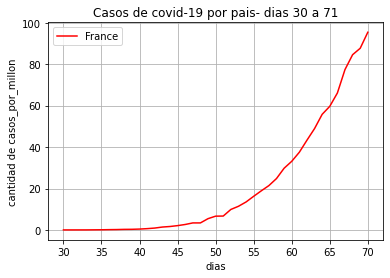

In [28]:
ind_=np.where(paises=="France")
ind_=ind_[0]
casos_=confirmados[ind_]
casos_principio=casos_[30:71]
dias_principio=dias[30:71]
plt.plot(dias_principio,casos_principio,color="r",label="France")
plt.title("Casos de covid-19 por pais- dias 30 a 71")
plt.xlabel('dias')
plt.ylabel('cantidad de casos_por_millon')
plt.grid()
plt.legend()

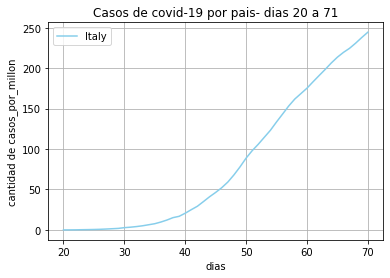

In [29]:
ind_=np.where(paises=='Italy')
ind_=ind_[0]
casos_=confirmados[ind_]
casos_principio=casos_[20:71]
dias_principio=dias[20:71]
plt.plot(dias_principio,casos_principio,color="skyblue",label="Italy")
plt.title("Casos de covid-19 por pais- dias 20 a 71")
plt.xlabel('dias')
plt.ylabel('cantidad de casos_por_millon')
plt.grid()
plt.legend()

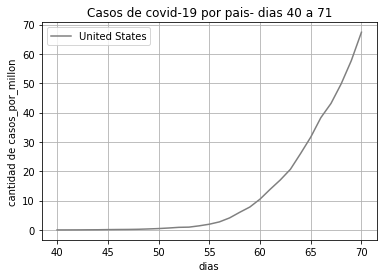

In [30]:
ind_=np.where(paises=='United States')
ind_=ind_[0]
casos_=confirmados[ind_]
casos_principio=casos_[40:71]
dias_principio=dias[40:71]
plt.plot(dias_principio,casos_principio,color="grey",label='United States')
plt.title("Casos de covid-19 por pais- dias 40 a 71")
plt.xlabel('dias')
plt.ylabel('cantidad de casos_por_millon')
plt.grid()
plt.legend()

**Observando los cuatro graficos Logaritmicos notamos que los periodos seleccionados para los diferentes paises estan correctos, ya que se puede observar que las curvas exponenciales llevadas a logaritmica se asemejan a lineales y esto se puede notar con facilidad en los graficos.**

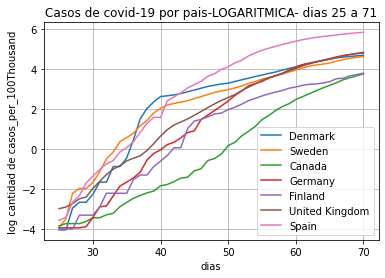

In [31]:
for i in lista_paises_norteA:
    ind_=np.where(paises==i)
    ind_=ind_[0]
    casos_=confirmados[ind_]
    casos_principio=casos_[25:71]
    dias_principio=dias[25:71]
    plt.plot(dias_principio,np.log(casos_principio),label=i)
    plt.title("Casos de covid-19 por pais-LOGARITMICA- dias 25 a 71")
    plt.xlabel('dias')
    plt.ylabel('log cantidad de casos_per_100Thousand')
    plt.grid()
    plt.legend()

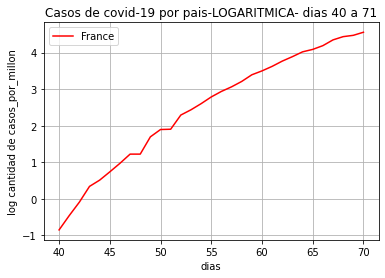

In [32]:
ind_=np.where(paises=="France")
ind_=ind_[0]
casos_=confirmados[ind_]
casos_principio=casos_[40:71]
dias_principio=dias[40:71]
plt.plot(dias_principio,np.log(casos_principio),color="r",label="France")
plt.title("Casos de covid-19 por pais-LOGARITMICA- dias 40 a 71")
plt.xlabel('dias')
plt.ylabel('log cantidad de casos_por_millon')
plt.grid()
plt.legend()

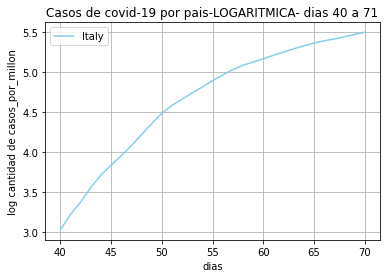

In [33]:
ind_=np.where(paises=='Italy')
ind_=ind_[0]
casos_=confirmados[ind_]
casos_principio=casos_[40:71]
dias_principio=dias[40:71]
plt.plot(dias_principio,np.log(casos_principio),color="skyblue",label="Italy")
plt.title("Casos de covid-19 por pais-LOGARITMICA- dias 40 a 71")
plt.xlabel('dias')
plt.ylabel('log cantidad de casos_por_millon')
plt.grid()
plt.legend()

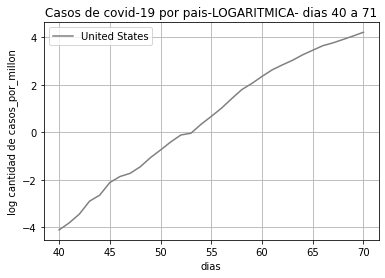

In [34]:
ind_=np.where(paises=='United States')
ind_=ind_[0]
casos_=confirmados[ind_]
casos_principio=casos_[40:71]
dias_principio=dias[40:71]
plt.plot(dias_principio,np.log(casos_principio),color="grey",label='United States')
plt.title("Casos de covid-19 por pais-LOGARITMICA- dias 40 a 71")
plt.xlabel('dias')
plt.ylabel('log cantidad de casos_por_millon')
plt.grid()
plt.legend()

## **¿Cual es el K de cada pais?**

**Averiguaremos el $k$ utilizando un ajuste hecho con el método de cuadrados mínimos, ajustando los datos al modelo .**

**$Confirmados=e^{k(t-t_0)}$**



In [35]:
#definimos función para ajustar modelo
def exponencial(t,k,t0):
  C=np.exp(k*(t-t0))
  return C

In [36]:
ind_=np.where(paises=='United States')
ind_=ind_[0]
casos_=confirmados[ind_]
casos_principioUS=casos_[40:71]
dias_principioUS=dias[40:71]
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principioUS, casos_principioUS)
popt

array([ 0.18141245, 46.53173735])

Veamos cómo se ajusta lo que obtuvimos a los datos reales

Text(0, 0.5, 'cantidad de casos_per_100Thousand')

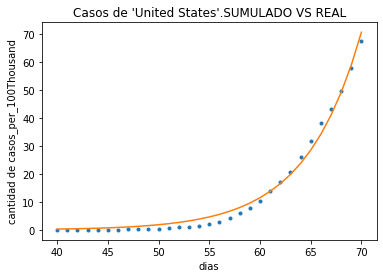

In [37]:
kUS=popt[0]
t0=popt[1]
casos_simuUS=exponencial(dias_principioUS,kUS,t0)
plt.plot(dias_principioUS,casos_principioUS,'.')
plt.plot(dias_principioUS,casos_simuUS)
plt.title("Casos de 'United States'.SUMULADO VS REAL")
plt.xlabel('dias')
plt.ylabel('cantidad de casos_per_100Thousand')

**Se ve que se ajusta casi perfectamente.**

In [38]:
ind_=np.where(paises=='France')
ind_=ind_[0]
casos_=confirmados[ind_]
casos_principioFR=casos_[30:71]
dias_principioFR=dias[30:71]
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principioFR, casos_principioFR)
popt

array([ 0.11948958, 31.16069669])

Veamos cómo se ajusta lo que obtuvimos a los datos reales

Text(0, 0.5, 'cantidad de casos_per_100Thousand')

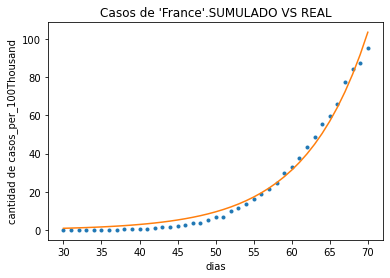

In [39]:
kFR=popt[0]
t0=popt[1]
casos_simuFR=exponencial(dias_principioFR,kFR,t0)
plt.plot(dias_principioFR,casos_principioFR,'.')
plt.plot(dias_principioFR,casos_simuFR)
plt.title("Casos de 'France'.SUMULADO VS REAL")
plt.xlabel('dias')
plt.ylabel('cantidad de casos_per_100Thousand')

**Se ve que se ajusta casi perfectamente.**

In [40]:
ind_=np.where(paises=='Canada')
ind_=ind_[0]
casos_=confirmados[ind_]
casos_principioCA=casos_[25:71]
dias_principioCA=dias[25:71]
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principioCA, casos_principioCA)
popt

array([ 0.14200656, 42.99261117])

Veamos cómo se ajusta lo que obtuvimos a los datos reales

Text(0, 0.5, 'cantidad de casos_per_100Thousand')

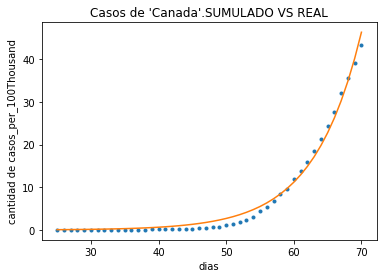

In [41]:
kCA=popt[0]
t0=popt[1]
casos_simuCA=exponencial(dias_principioCA,kCA,t0)
plt.plot(dias_principioCA,casos_principioCA,'.')
plt.plot(dias_principioCA,casos_simuCA)
plt.title("Casos de 'Canada'.SUMULADO VS REAL")
plt.xlabel('dias')
plt.ylabel('cantidad de casos_per_100Thousand')

**Se ve que se ajusta casi perfectamente.**

In [42]:
ind_=np.where(paises=='Germany')
ind_=ind_[0]
casos_=confirmados[ind_]
casos_principioGR=casos_[25:71]
dias_principioGR=dias[25:71]
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principioGR, casos_principioGR)
popt

array([ 0.10148202, 21.1893039 ])

Veamos cómo se ajusta lo que obtuvimos a los datos reales

Text(0, 0.5, 'cantidad de casos_per_100Thousand')

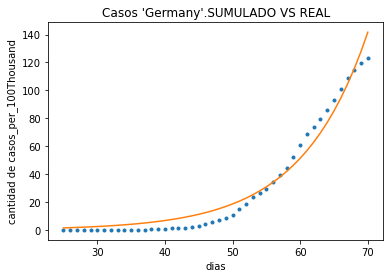

In [43]:
kGE=popt[0]
t0=popt[1]
casos_simuGR=exponencial(dias_principioGR,kGE,t0)
plt.plot(dias_principioGR,casos_principioGR,'.')
plt.plot(dias_principioGR,casos_simuGR)
plt.title("Casos 'Germany'.SUMULADO VS REAL")
plt.xlabel('dias')
plt.ylabel('cantidad de casos_per_100Thousand')

**Se ve que se ajusta casi perfectamente.**

In [44]:
ind_=np.where(paises=='Finland')
ind_=ind_[0]
casos_=confirmados[ind_]
casos_principioFI=casos_[25:71]
dias_principioFI=dias[25:71]
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principioFI, casos_principioFI)
popt

array([ 0.08897787, 26.67417468])

Veamos cómo se ajusta lo que obtuvimos a los datos reales

Text(0, 0.5, 'cantidad de casos_per_100Thousand')

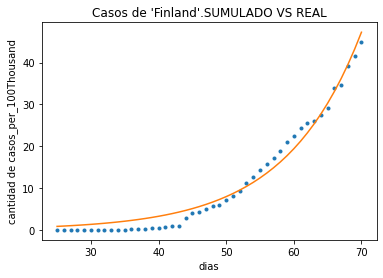

In [45]:
kFI=popt[0]
t0=popt[1]
casos_simuFI=exponencial(dias_principioFI,kFI,t0)
plt.plot(dias_principioFI,casos_principioFI,'.')
plt.plot(dias_principioFI,casos_simuFI)
plt.title("Casos de 'Finland'.SUMULADO VS REAL")
plt.xlabel('dias')
plt.ylabel('cantidad de casos_per_100Thousand')

**Se ve que se ajusta casi perfectamente.**

In [46]:
ind_=np.where(paises=='United Kingdom')
ind_=ind_[0]
casos_=confirmados[ind_]
casos_principioUK=casos_[25:71]
dias_principioUK=dias[25:71]
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principioUK, casos_principioUK)
popt

array([ 0.101362  , 21.20455414])

Veamos cómo se ajusta lo que obtuvimos a los datos reales

Text(0, 0.5, 'cantidad de casos_per_100Thousand')

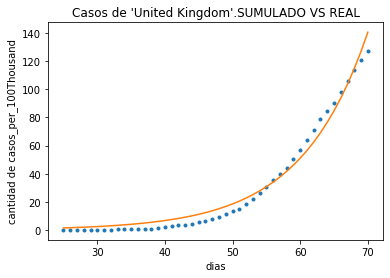

In [47]:
kUK=popt[0]
t0=popt[1]
casos_simuUK=exponencial(dias_principioUK,kUK,t0)
plt.plot(dias_principioUK,casos_principioUK,'.')
plt.plot(dias_principioUK,casos_simuUK)
plt.title("Casos de 'United Kingdom'.SUMULADO VS REAL")
plt.xlabel('dias')
plt.ylabel('cantidad de casos_per_100Thousand')

**Se ve que se ajusta casi perfectamente.**

In [48]:
ind_=np.where(paises=='Spain')
ind_=ind_[0]
casos_=confirmados[ind_]
casos_principioSP=casos_[25:71]
dias_principioSP=dias[25:71]
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principioSP, casos_principioSP)
popt

array([ 0.08151364, -3.80966588])

Veamos cómo se ajusta lo que obtuvimos a los datos reales

Text(0, 0.5, 'cantidad de casos_per_100Thousand')

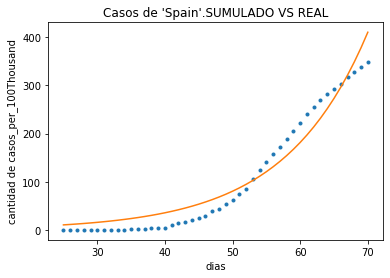

In [49]:
kSP=popt[0]
t0=popt[1]
casos_simuSP=exponencial(dias_principioSP,kSP,t0)
plt.plot(dias_principioSP,casos_principioSP,'.')
plt.plot(dias_principioSP,casos_simuSP)
plt.title("Casos de 'Spain'.SUMULADO VS REAL")
plt.xlabel('dias')
plt.ylabel('cantidad de casos_per_100Thousand')

**Se ve que se ajusta casi perfectamente.**

In [50]:
ind_=np.where(paises=='Italy')
ind_=ind_[0]
casos_=confirmados[ind_]
casos_principioIT=casos_[20:71]
dias_principioIT=dias[20:71]
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principioIT, casos_principioIT)
popt

array([  0.06458661, -17.59414474])

Veamos cómo se ajusta lo que obtuvimos a los datos reales

Text(0, 0.5, 'cantidad de casos_per_100Thousand')

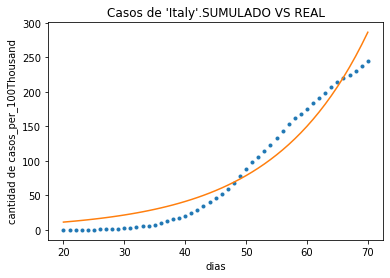

In [51]:
kIT=popt[0]
t0=popt[1]
casos_simuIT=exponencial(dias_principioIT,kIT,t0)
plt.plot(dias_principioIT,casos_principioIT,'.')
plt.plot(dias_principioIT,casos_simuIT)
plt.title("Casos de 'Italy'.SUMULADO VS REAL")
plt.xlabel('dias')
plt.ylabel('cantidad de casos_per_100Thousand')

**Se ve que se ajusta casi perfectamente.**

In [52]:
ind_=np.where(paises=='Sweden')
ind_=ind_[0]
casos_=confirmados[ind_]
casos_principioSW=casos_[25:71]
dias_principioSW=dias[25:71]
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principioSW, casos_principioSW)
popt

array([ 0.08363058, 13.59357149])

Veamos cómo se ajusta lo que obtuvimos a los datos reales

Text(0, 0.5, 'cantidad de casos_per_100Thousand')

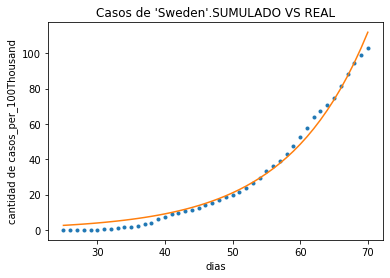

In [53]:
kSW=popt[0]
t0=popt[1]
casos_simuSW=exponencial(dias_principioSW,kSW,t0)
plt.plot(dias_principioSW,casos_principioSW,'.')
plt.plot(dias_principioSW,casos_simuSW)
plt.title("Casos de 'Sweden'.SUMULADO VS REAL")
plt.xlabel('dias')
plt.ylabel('cantidad de casos_per_100Thousand')

**Se ve que se ajusta casi perfectamente.**

In [54]:
ind_=np.where(paises=='Denmark')
ind_=ind_[0]
casos_=confirmados[ind_]
casos_principioDE=casos_[25:71]
dias_principioDE=dias[25:71]
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principioDE, casos_principioDE)
popt

array([0.07482635, 5.69701545])

Veamos cómo se ajusta lo que obtuvimos a los datos reales

Text(0, 0.5, 'cantidad de casos_per_100Thousand')

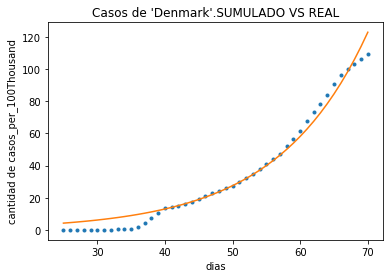

In [55]:
kDE=popt[0]
t0=popt[1]
casos_simuDE=exponencial(dias_principioDE,kDE,t0)
plt.plot(dias_principioDE,casos_principioDE,'.')
plt.plot(dias_principioDE,casos_simuDE)
plt.title("Casos de 'Denmark'.SUMULADO VS REAL")
plt.xlabel('dias')
plt.ylabel('cantidad de casos_per_100Thousand')

**Se ve que se ajusta casi perfectamente.**

### **Compararemos y analisaremos el K de los 10 paises seleccionados y el K del mundo. Veremos si se puede decir que el comportamiento de los paises seleccionados es igual al del mundo.**

In [56]:
list_total_paises=paises.unique().tolist()

[  0.06253573 -20.28992361]


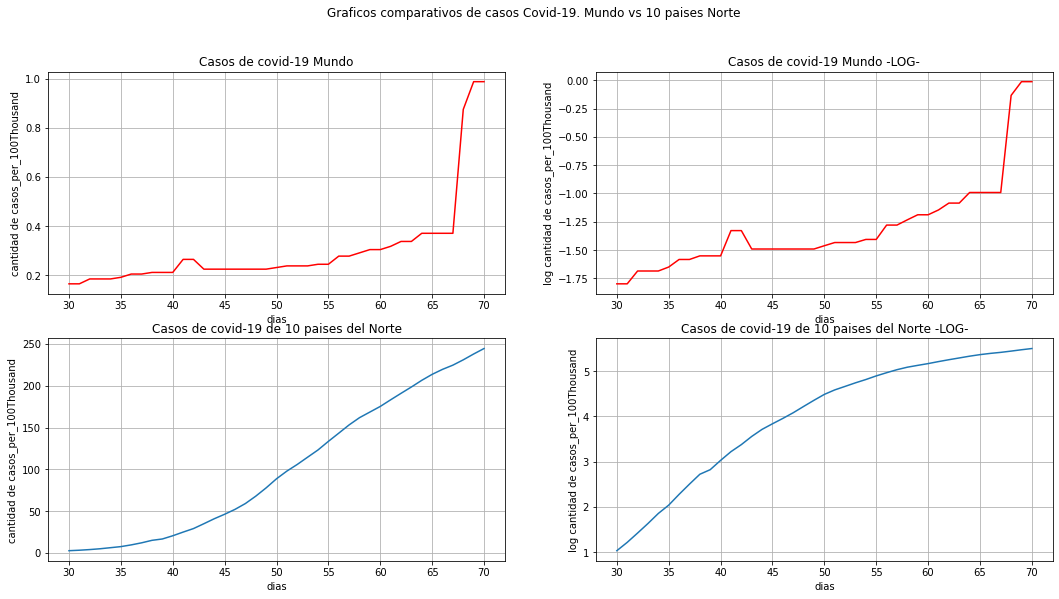

In [57]:
for i in list_total_paises:
    ind_=np.where(paises==i)
    ind_=ind_[0]
    casos_=confirmados[ind_]
    casos_principioW=casos_[30:71]
    dias_principioW=dias[30:71]
    
    
for i in lista_paises_norte:
    ind_=np.where(paises==i)
    ind_=ind_[0]
    casos_=confirmados[ind_]
    casos_principio10pn=casos_[30:71]
    dias_principio10pn=dias[30:71]

    
popt, pcov = curve_fit(exponencial, dias_principio10pn, casos_principio10pn)
print(popt)       

plt.figure(figsize=(18,9))
plt.suptitle("Graficos comparativos de casos Covid-19. Mundo vs 10 paises Norte")
plt.subplot(2,2,1)
plt.plot(dias_principioW,casos_principioW,color="r")
plt.title("Casos de covid-19 Mundo")
plt.xlabel('dias')
plt.ylabel('cantidad de casos_per_100Thousand')    
plt.grid()
plt.subplot(2,2,2)
plt.plot(dias_principioW,np.log(casos_principioW),color="r")
plt.title("Casos de covid-19 Mundo -LOG-")
plt.xlabel('dias')
plt.ylabel('log cantidad de casos_per_100Thousand')
plt.grid()
plt.subplot(2,2,3)
plt.plot(dias_principio10pn,casos_principio10pn)
plt.title("Casos de covid-19 de 10 paises del Norte")
plt.xlabel('dias')
plt.ylabel('cantidad de casos_per_100Thousand')    
plt.grid()
plt.subplot(2,2,4)
plt.plot(dias_principio10pn,np.log(casos_principio10pn))
plt.title("Casos de covid-19 de 10 paises del Norte -LOG-")
plt.xlabel('dias')
plt.ylabel('log cantidad de casos_per_100Thousand')
plt.grid()
plt.show()

**Tomamos un promedio de los dias de inicio de la curva de casos de los paises seleccionados, dando el dia 30 hasta el dia 71 donde en todos los paises seleccionados se estabiliza la curva de casos.**

**Desde ya se nota que no es comparable por que vemos que en el caso de los paises se nota la exponencialidad en el periodo hasta la estabilizacion, pero con respecto al mundo se nota que en conjunto ni siquiera empezo esta exponencialidad, esta mucho mas retrazado, esto es logico que la pandemia fue expandiendose por todos los paises del mundo a traves del tiempo, que indudablemente no fue en el mismo periodo que los 10 paises del norte seleccionados.**

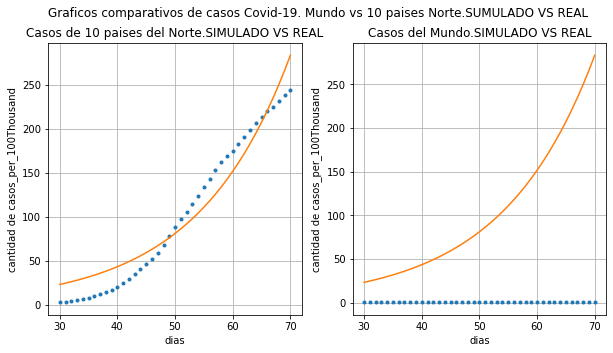

In [58]:
k=popt[0]
t0=popt[1]
casos_simuMundo=exponencial(dias_principioW,k,t0)
casos_simu10pn=exponencial(dias_principioW,k,t0)

plt.figure(figsize=(10,5))
plt.suptitle("Graficos comparativos de casos Covid-19. Mundo vs 10 paises Norte.SUMULADO VS REAL")
plt.subplot(1,2,1)
plt.plot(dias_principio10pn,casos_principio10pn,'.',label="Real")
plt.plot(dias_principio10pn,casos_simu10pn,label="Simulado")
plt.title("Casos de 10 paises del Norte.SIMULADO VS REAL")
plt.xlabel('dias')
plt.ylabel('cantidad de casos_per_100Thousand')
plt.grid()
plt.subplot(1,2,2)
plt.title("Casos del Mundo.SIMULADO VS REAL")
plt.plot(dias_principioW,casos_principioW,'.',label="Real")
plt.plot(dias_principioW,casos_simuMundo,label="Simulado")
plt.xlabel('dias')
plt.ylabel('cantidad de casos_per_100Thousand')
plt.grid()

**Volvemos a notar que los paises seleccionados con respecto al mundo no es comparable ni extrapolable.**

**Aqui tomamos la K de los paises seleccionados para simular la exponencialidad de los casos de mundo y vemos que en el caso de los 10 paise se acomodan bastante bien con los casos reales, pero en el grafico del mundo lejos esta de poder predecir los casos del mundo con el K de los 10 paises; cuales son los motivos los mismo que los que fueren explicados en el grafico anterior, el tiempo en que de expandio el virus en estos paises y el resto del mundo.**

In [59]:
k10p = [kSW,kUS,kFR,kCA,kGE,kDE,kFI,kUK,kSP,kIT]
k10p = pd.DataFrame(k10p)

In [60]:
k10p.describe()

,0
count,10.000000
mean,0.103929
std,0.035341
min,0.064587
25%,0.082043
50%,0.095170
75%,0.114988
max,0.181412


**Aqui vemos el promedio de la K de los diez paises.**

In [61]:
mu_k10p=np.mean(k10p)
sigma_k10p=np.std(k10p)
z=1.96
n100=len(k10p)
int_conf= [mu_k10p-z*sigma_k10p/np.sqrt(n100),mu_k10p+z*sigma_k10p/np.sqrt(n100)]
print(int_conf )
print((int_conf[1] - int_conf[0]))

[0    0.083148
dtype: float64, 0    0.124709
dtype: float64]
0    0.041561
dtype: float64


**Vemos entonces que el intervalo de confianza de confianza de  𝑘  para los 10 paises escogidos se encuentra entre [0.83148 , 0.124709] con una diferencia de 0.041561 entre los valores del intervalo.**

## **Seleccionaremos los 10 paises segun la Politica elegida para el analisis "Cuarentena Nacional Obligatoria" vs "Cuarentena Regional o No Cuarentena".**

**Para seleccionar que paises hicieron cuarentena y cuales no; y en que fechas empezeron, esta informacion la obtuvimos del siguiente link.**

https://es.wikipedia.org/wiki/Confinamiento_por_la_pandemia_de_COVID-19#Cuarentena_por_pa%C3%ADses


CUARENTENA REGIONAL O NO HICIERON CUARENTENA.-Binario 1

'United States'-19/03/2020 AL Inicio Vacunacion.

'Finland'-------27/03/2020 AL Inicio Vacunacion.

'Germany'-------20/03/2020 AL Inicio Vacunacion.

'Sweden'--------19/03/2020 AL Inicio Vacunacion.

'Canada'--------19/03/2020 AL Inicio Vacunacion.

CUARENTENA NACIONAL.-Binario 0

'Spain'-----------15/03/2020 AL Inicio Vacunacion.

'Italy'-----------09/03/2020 AL Inicio Vacunacion.

'Denmark'---------11/03/2020 AL Inicio Vacunacion.

'France'----------17/03/2020 AL Inicio Vacunacion.

'United Kingdom'--20/03/2020 AL Inicio Vacunacion.

**El motivo por el cual dejamos la variable "people_vaccinated" era para determinar la fecha de inicio de la vacunacion y poder aislar la politica de cuarentena.**

In [62]:
dataset_covid.describe()

,reproduction_rate,people_vaccinated,stringency_index,population_per_100Thousand,total_cases_per_100Thousand,new_cases_per_100Thousand,new_deaths_per_100Thousand,population_density_per_100Thousand
count,103734.000000,2.893200e+04,109823.000000,125607.000000,118458.000000,118448.000000,107463.000000,121016.000000
mean,0.997878,1.190476e+07,56.082621,406.640997,2042.473960,8.903597,0.158795,0.004045
std,0.340875,4.789701e+07,20.652294,1505.520249,3421.231642,20.986016,0.423609,0.018828
min,-0.030000,0.000000e+00,0.000000,0.000470,0.000072,-312.582950,-7.591093,0.000001
25%,0.830000,2.184120e+05,41.670000,17.482950,39.953041,0.020359,0.000000,0.000359
50%,1.000000,1.287410e+06,56.480000,87.154940,313.570749,1.008903,0.013134,0.000835
75%,1.170000,5.847932e+06,71.760000,296.749200,2559.330014,8.305379,0.130498,0.002128
max,6.000000,1.225000e+09,100.000000,14442.161020,24681.275884,862.068966,20.351281,0.205468


**Tomamos los 10 paises, 5 de los cuales hicieron "Cuarentena Nacional Obligarotia" y 5 de los cuales hicieron "Cuarentena Regional o No hicieron Cuarentena", tambien tomamos 3 paises mas para luego corroborar si el mejor modelo segun lo indicadores de la curvas logra predecir si estos paises hicieron o no cuarentena nacional.**

In [63]:
dataset_paises_Analisis=dataset_covid[dataset_covid.location.isin(['United States','Finland','Germany','Sweden','Canada','Spain','Italy','Denmark','France','United Kingdom',"Brazil",'Argentina',"Croatia" ])]

In [64]:
dataset_paises_Analisis["date"]=pd.to_datetime(dataset_paises_Analisis.date)

In [65]:
dataset_paises_Analisis=dataset_paises_Analisis.set_index("date")

In [66]:
DS_US_all_date=dataset_paises_Analisis[(dataset_paises_Analisis["location"]=='United States')]
DS_FI_all_date=dataset_paises_Analisis[(dataset_paises_Analisis["location"]=='Finland')]
DS_GE_all_date=dataset_paises_Analisis[(dataset_paises_Analisis["location"]=='Germany')]
DS_SW_all_date=dataset_paises_Analisis[(dataset_paises_Analisis["location"]=='Sweden')]
DS_CA_all_date=dataset_paises_Analisis[(dataset_paises_Analisis["location"]=='Canada')]
DS_SP_all_date=dataset_paises_Analisis[(dataset_paises_Analisis["location"]=='Spain')]
DS_IT_all_date=dataset_paises_Analisis[(dataset_paises_Analisis["location"]=='Italy')]
DS_DE_all_date=dataset_paises_Analisis[(dataset_paises_Analisis["location"]=='Denmark')]
DS_FR_all_date=dataset_paises_Analisis[(dataset_paises_Analisis["location"]=='France')]
DS_UK_all_date=dataset_paises_Analisis[(dataset_paises_Analisis["location"]=='United Kingdom')]
DS_BR_all_date=dataset_paises_Analisis[(dataset_paises_Analisis["location"]=='Brazil')]
DS_AR_all_date=dataset_paises_Analisis[(dataset_paises_Analisis["location"]=='Argentina')]
DS_CR_all_date=dataset_paises_Analisis[(dataset_paises_Analisis["location"]=='Croatia')]

**Seleccionamos las fechas de los diferentes paises.**

In [67]:
DS_US=DS_US_all_date['2020-03-19':'2020-12-12']
DS_FI=DS_FI_all_date['2020-03-27':'2021-01-24']
DS_GE=DS_GE_all_date['2020-03-20':'2020-12-26']
DS_SW=DS_SW_all_date['2020-03-19':'2020-12-26']
DS_CA=DS_CA_all_date['2020-03-19':'2020-12-13']
DS_SP=DS_SP_all_date["2020-03-15":"2021-01-03"]
DS_IT=DS_IT_all_date['2020-03-09':'2020-12-26']
DS_DE=DS_DE_all_date['2020-03-11':'2020-11-30']
DS_FR=DS_FR_all_date['2020-05-17':'2020-12-26']
DS_UK=DS_UK_all_date['2020-07-20':'2021-01-09'] 
DS_BR=DS_BR_all_date['2020-03-19':'2020-12-13']
DS_AR=DS_AR_all_date['2020-03-20':'2020-12-13']
DS_CR=DS_CR_all_date['2020-03-18':'2020-12-13']

In [68]:
DSet_paises_Analisis=DS_US.append(DS_FI)
DSet_paises_Analisis=DSet_paises_Analisis.append(DS_GE)
DSet_paises_Analisis=DSet_paises_Analisis.append(DS_SW)
DSet_paises_Analisis=DSet_paises_Analisis.append(DS_CA)
DSet_paises_Analisis=DSet_paises_Analisis.append(DS_SP)
DSet_paises_Analisis=DSet_paises_Analisis.append(DS_IT)
DSet_paises_Analisis=DSet_paises_Analisis.append(DS_DE)
DSet_paises_Analisis=DSet_paises_Analisis.append(DS_FR)
DSet_paises_Analisis=DSet_paises_Analisis.append(DS_UK)
DSet_paises_Analisis=DSet_paises_Analisis.append(DS_BR)
DSet_paises_Analisis=DSet_paises_Analisis.append(DS_AR)
DSet_paises_Analisis=DSet_paises_Analisis.append(DS_CR)

In [69]:
DSet_paises_Analisis.reset_index(inplace=True)

In [70]:
DSet_paises_Analisis["new_deaths_per_100Thousand"].fillna(0,inplace=True)
DSet_paises_Analisis["reproduction_rate"].fillna(0,inplace=True)

In [71]:
DSet_paises_Analisis.isna().sum()

date                                  0   
location                              0   
reproduction_rate                     0   
people_vaccinated                     3469
stringency_index                      0   
population_per_100Thousand            0   
total_cases_per_100Thousand           0   
new_cases_per_100Thousand             0   
new_deaths_per_100Thousand            0   
population_density_per_100Thousand    0   
dtype: int64

**Filtramos numero negativos en las variables "new_cases_per_100Thousand", "new_deaths_per_100Thousand", ya que no puede haber ni casos negativos y menos muertes negativas.**

In [72]:
DSet_paises_Analisis=DSet_paises_Analisis[(DSet_paises_Analisis["new_cases_per_100Thousand"]>=0) ]
DSet_paises_Analisis=DSet_paises_Analisis[(DSet_paises_Analisis["new_deaths_per_100Thousand"]>=0) ]


**Agarramos los 10 paises de los cuales haremos el analisis de la politica seleccionada para analizar y los clasificaremos con 0 y 1; Cero (0) los que hicieron cuarentena Nacional y uno (1) los que hicieron cuarentena Regional o no cuarentena.**

In [73]:
dataset_cuarentenaRegion=DSet_paises_Analisis[DSet_paises_Analisis.location.isin(['United States','Finland','Germany','Sweden','Canada'])]
dataset_cuarentenaRegion["si_no_Cuarentena"]=1
dataset_cuarentenaNacion=DSet_paises_Analisis[DSet_paises_Analisis.location.isin(['Spain','Italy','Denmark','France','United Kingdom'])]
dataset_cuarentenaNacion["si_no_Cuarentena"]=0

In [74]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from scipy.special import expit
from sklearn.naive_bayes import GaussianNB

# Evaluando estrategias

**Evaluaremos las estrategias de los paises a traves de valores objetivos tomados de distintas fuentes, en titulos explicitaremos que indicador estamos evaluando.**

**Lo evaluatemos por separado, osea los que hicieron o no cuarentena Nacional.**

## **new_cases_per_100Thousand**

**Del siguiente link de la CDC tomamos lo rango de Nuevos casos para evaluar si la cuarentena naciona o regional fueron efectiva tomamos que nuevos casos menores de 50 por cada 100 mil es que mejoro, por encima empeoro.**

https://www.cdc.gov/coronavirus/2019-ncov/travelers/how-level-is-determined.html

In [75]:
def rango_Aumen_Baja (fila): 
  if fila < 50 :
     return 0
  else : 
     return 1 

**Evaluamos la efectividad de la Cuarentena Regional.**

In [76]:
dataset_cuarentenaRegion["Aument_BajaNC"] = dataset_cuarentenaRegion["new_cases_per_100Thousand"].map(rango_Aumen_Baja)

In [77]:
dataset_cuarentenaRegion.head(1)

,date,location,reproduction_rate,people_vaccinated,stringency_index,population_per_100Thousand,total_cases_per_100Thousand,new_cases_per_100Thousand,new_deaths_per_100Thousand,population_density_per_100Thousand,si_no_Cuarentena,Aument_BajaNC
0,2020-03-19,United States,3.6,NaN,67.13,3329.15074,4.10405,1.349894,0.021627,0.000356,1,0


**Vemos que la cuarentena regional fue efectiva, lo vemos en el grafico donde la categoria cero (0) que significa que mejoro es muy superior a la categoria uno (1) que es la que empeoro.**

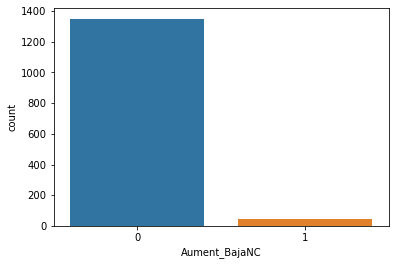

In [78]:
sns.countplot(x="Aument_BajaNC",data=dataset_cuarentenaRegion)
plt.show()

**Evaluamos la efectividad de la Cuarentena Nacional Obligatoria.**

In [79]:
dataset_cuarentenaNacion["Aument_BajaNC"] = dataset_cuarentenaNacion["new_cases_per_100Thousand"].map(rango_Aumen_Baja)

In [80]:
dataset_cuarentenaNacion.head(1)

,date,location,reproduction_rate,people_vaccinated,stringency_index,population_per_100Thousand,total_cases_per_100Thousand,new_cases_per_100Thousand,new_deaths_per_100Thousand,population_density_per_100Thousand,si_no_Cuarentena,Aument_BajaNC
1408,2020-03-15,Spain,2.5,NaN,67.13,467.45211,16.681923,3.009934,0.20109,0.000931,0,0


**Vemos que la cuarentena Nacional fue efectiva, lo vemos en el grafico donde la categoria cero (0) que significa que mejoro es muy superior a la categoria uno (1) que es la que empeoro.**

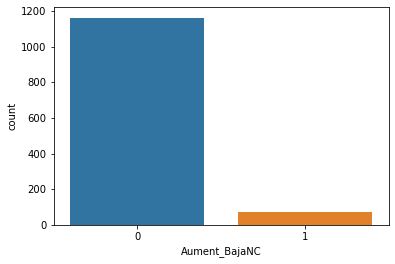

In [81]:
sns.countplot(x="Aument_BajaNC",data=dataset_cuarentenaNacion)
plt.show()

**Se puede concluir que las dos estrategias fuere efectivas, ya que lograron reducir sus casos segun lo recomendado por la CDC. Se puede deber a muchos factores pero creemos que es por una cuestion de resposabilidad social.**

## **reproduction_rate

**Del siguiente link de la BBC tomamos la informacion que nos hace entender como funciona el ratio de reproduccion el cual si este es menor a 1 es que se esta logrando frenar el contagio, si es mayor a uno este sigue reproduciendoce.El valor inicia de la pandemia fue de 2,5.**

**Este a mi entender es el mejor indicador para medir la eficacia de cualquier Politica sanitaria de cualquier pais, en este proyecto esta politica es la cuarentena Nacional vs. la cuarentena regional o no cuarentena.**

https://www.bbc.com/mundo/noticias-51469198

In [82]:
def rango_Aumen_BajaRR (fila): 
  if fila < 1 :
     return 0
  else : 
     return 1 

**Evaluamos la efectividad de la Cuarentena Regional.**

In [83]:
dataset_cuarentenaRegion["Aument_BajaRR"] = dataset_cuarentenaRegion["reproduction_rate"].map(rango_Aumen_BajaRR)

In [84]:
dataset_cuarentenaRegion.head(1)

,date,location,reproduction_rate,people_vaccinated,stringency_index,population_per_100Thousand,total_cases_per_100Thousand,new_cases_per_100Thousand,new_deaths_per_100Thousand,population_density_per_100Thousand,si_no_Cuarentena,Aument_BajaNC,Aument_BajaRR
0,2020-03-19,United States,3.6,NaN,67.13,3329.15074,4.10405,1.349894,0.021627,0.000356,1,0,1


**Vemos que con este criterio de evaluacion los paises que hicieron cuarentena regional no fue muy eficiente ya que en la mayoria de los casos no se pudo frenar el contagio.**

**Igualmente vemos que en un 29% fue efectiva.**

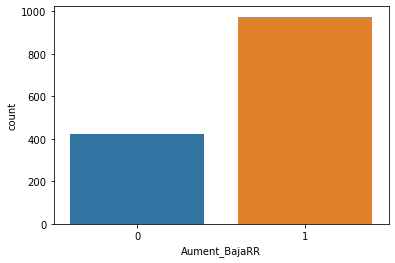

In [85]:
sns.countplot(x="Aument_BajaRR",data=dataset_cuarentenaRegion)
plt.show()

**Evaluamos la efectividad de la Cuarentena Nacional Obligatoria.**

In [86]:
dataset_cuarentenaNacion["Aument_BajaRR"] = dataset_cuarentenaNacion["reproduction_rate"].map(rango_Aumen_BajaRR)

In [87]:
dataset_cuarentenaNacion.head(1)

,date,location,reproduction_rate,people_vaccinated,stringency_index,population_per_100Thousand,total_cases_per_100Thousand,new_cases_per_100Thousand,new_deaths_per_100Thousand,population_density_per_100Thousand,si_no_Cuarentena,Aument_BajaNC,Aument_BajaRR
1408,2020-03-15,Spain,2.5,NaN,67.13,467.45211,16.681923,3.009934,0.20109,0.000931,0,0,1


**Vemos que con este criterio de evaluacion los paises que hicieron cuarentena nacional no fue muy eficiente ya que en la mayoria de los casos no se pudo frenar el contagio.**

**Igualmente vemos que en un 33% fue efectiva.**

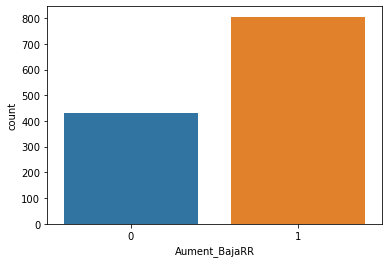

In [88]:
sns.countplot(x="Aument_BajaRR",data=dataset_cuarentenaNacion)
plt.show()

**Notamos que segun este indicador las distintas cuarentenas no fueron sufucientemente efectivas, pero que algun resultado tuviernon.**

**Lo que noto desde ya es que este indicador mucho mejor balanceado que los nuevos casos por lo que creemos que sera el mas optimo para generar el modelo clasificador que nos indique que politica de cuarentena hicieron los diferentes paises.**

## **new_deaths_per_100Thousand


**Del siguiente link de la BBC obtivimos la tasa de mortalidad general que es de 2,3% .Vamos a aplicar esta tasa a los rango de nuevos casos para poner de rango cuantas muertes por cada 100 mil habitantes es la medida que nos va a indicar si mejoro o empeoro la pandemia en las distintas politicas sanitarias, en este caso si hicieron cuarentena nacional o no.**

https://www.bbc.com/mundo/noticias-51614537

**El calculo es muy simple, nos da 1.15 igualmente vamos a tomar 1 muerte por cada 100 mill habitantes para clasificar si fue bueno o malas la estrategia tomada por los paises seleccionados.**

In [89]:
50*0.023

1.15

In [90]:
def rango_Aumen_BajaND (fila): 
  if fila < 1 :
     return 0
  else : 
     return 1 

**Evaluamos la efectividad de la Cuarentena Regional.**

In [91]:
dataset_cuarentenaRegion["Aument_BajaND"] = dataset_cuarentenaRegion["new_deaths_per_100Thousand"].map(rango_Aumen_BajaND)

In [92]:
dataset_cuarentenaRegion.head(1)

,date,location,reproduction_rate,people_vaccinated,stringency_index,population_per_100Thousand,total_cases_per_100Thousand,new_cases_per_100Thousand,new_deaths_per_100Thousand,population_density_per_100Thousand,si_no_Cuarentena,Aument_BajaNC,Aument_BajaRR,Aument_BajaND
0,2020-03-19,United States,3.6,NaN,67.13,3329.15074,4.10405,1.349894,0.021627,0.000356,1,0,1,0


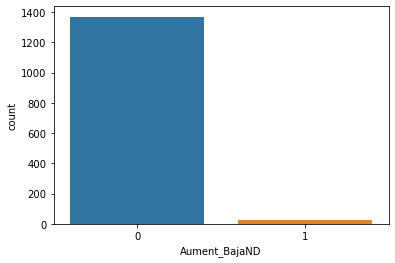

In [93]:
sns.countplot(x="Aument_BajaND",data=dataset_cuarentenaRegion)
plt.show()

**El grafico nos indica que el cuestion de nuevas muertes la cuarentena regional fue eficaz.**

**Evaluamos la efectividad de la Cuarentena Nacional Obligatoria.**

In [94]:
dataset_cuarentenaNacion["Aument_BajaND"] = dataset_cuarentenaNacion["new_deaths_per_100Thousand"].map(rango_Aumen_BajaND)

In [95]:
dataset_cuarentenaNacion.head(1)

,date,location,reproduction_rate,people_vaccinated,stringency_index,population_per_100Thousand,total_cases_per_100Thousand,new_cases_per_100Thousand,new_deaths_per_100Thousand,population_density_per_100Thousand,si_no_Cuarentena,Aument_BajaNC,Aument_BajaRR,Aument_BajaND
1408,2020-03-15,Spain,2.5,NaN,67.13,467.45211,16.681923,3.009934,0.20109,0.000931,0,0,1,0


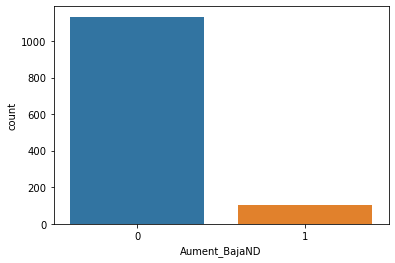

In [96]:
sns.countplot(x="Aument_BajaND",data=dataset_cuarentenaNacion)
plt.show()

**El grafico nos indica que el cuestion de nuevas muertes la cuarentena nacional fue eficaz.**

### **Perparando los datos para modelar.**

Unimos los dos dataset de paises que hicieron cuarentena nacional y regional.

In [97]:
DS_paises_Analisis=dataset_cuarentenaNacion.append(dataset_cuarentenaRegion)
print(DS_paises_Analisis.shape)

(2630, 14)


Corroboramos que no haya faltantes, y si que en "people vaccinated este 100% faltantes lo que nos indicaria que aislamos bien la politica de cuarentena.

Vemos que en este dataset estan las variables Aument_BajaNC / Aument_BajaRR / Aument_BajaND que son la clasificaciones que hicimos anteriormente para evaluar si los distintos estilo de cuarentena fueron o no eficazes, estas variables son las que vamos a poner en los modelos de clasificacion (con otras) para ver si es posible predecir si un pais hizo o no cuarentena nacional obligatoria.

In [98]:
for col in DS_paises_Analisis.columns:
    nulos=DS_paises_Analisis[col].isna().sum()
    print(col, "{:.2f}%".format(nulos*100/2630))

date 0.00%
location 0.00%
reproduction_rate 0.00%
people_vaccinated 100.00%
stringency_index 0.00%
population_per_100Thousand 0.00%
total_cases_per_100Thousand 0.00%
new_cases_per_100Thousand 0.00%
new_deaths_per_100Thousand 0.00%
population_density_per_100Thousand 0.00%
si_no_Cuarentena 0.00%
Aument_BajaNC 0.00%
Aument_BajaRR 0.00%
Aument_BajaND 0.00%


In [99]:
print(DS_paises_Analisis.shape)
DS_paises_Analisis.describe()

(2630, 14)


,reproduction_rate,people_vaccinated,stringency_index,population_per_100Thousand,total_cases_per_100Thousand,new_cases_per_100Thousand,new_deaths_per_100Thousand,population_density_per_100Thousand,si_no_Cuarentena,Aument_BajaNC,Aument_BajaRR,Aument_BajaND
count,2630.000000,0.0,2630.000000,2630.000000,2630.000000,2630.000000,2630.000000,2630.000000,2630.000000,2630.000000,2630.000000,2630.000000
mean,1.133327,NaN,63.067114,710.572601,858.010027,11.088529,0.232735,0.001088,0.530418,0.044867,0.676426,0.049049
std,0.302220,NaN,12.124679,923.648109,988.380572,18.522303,0.359773,0.000897,0.499169,0.207051,0.467929,0.216012
min,0.590000,NaN,32.410000,55.483610,2.419360,0.000000,0.000000,0.000040,0.000000,0.000000,0.000000,0.000000
25%,0.930000,NaN,56.940000,101.601590,239.803780,1.058348,0.010508,0.000247,0.000000,0.000000,0.000000,0.000000
50%,1.110000,NaN,64.810000,467.452110,448.045386,3.860246,0.069230,0.000931,1.000000,0.000000,1.000000,0.000000
75%,1.280000,NaN,71.300000,682.071140,977.389295,13.619042,0.310815,0.002059,1.000000,0.000000,1.000000,0.000000
max,3.600000,NaN,93.520000,3329.150740,4891.716318,219.671759,3.472013,0.002729,1.000000,1.000000,1.000000,1.000000


El dataset se encuentra en relacion a si hizo o no cuarentena nacional vemos que esta balanceado 60% 40%.

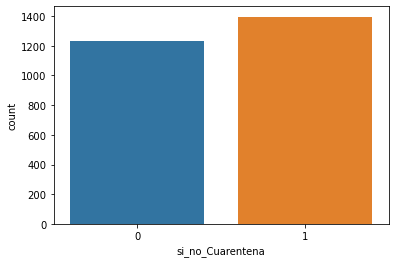

In [100]:
sns.countplot(x="si_no_Cuarentena",data=DS_paises_Analisis)
plt.show()

## Modelando.

Para el modelado vamos a utilizar la Regresion logistica que es un clasificador y la vamos a evaluar a traves del accuracy, haremos tres modelos tomando variables en comun (el cual explicaremos) y cada modelo tendra la diferencia de la variable indicadora y la variable categorica de si fue o no efectiva la politica.
La variable a predecir es "Si hizo o no Cuartena nacional obligatoria. Cero (0) "si hizo"; uno (1) "no hizo".

Variables en comun:
"stringency_index"= dice que tan estricta fue la politica.
"population_per_100Thousand"= cantidad de poblacion para marcar que los paises tiene diferentes cantidades de pobladores.
"population_density_per_100Thousand"= La densidad poblacional el cual no es lo mismo que poblacion.

Para modelar utilizaremos el modelo de Regresion logistica de la libreria Scikit Learn. 

## **new_cases_per_100Thousand

In [101]:
Xnc=DS_paises_Analisis[["stringency_index","population_density_per_100Thousand","population_per_100Thousand","new_cases_per_100Thousand","Aument_BajaNC"]]
ync=DS_paises_Analisis["si_no_Cuarentena"]

In [102]:
Xnc_train, Xnc_test, ync_train, ync_test = train_test_split(Xnc, ync, test_size = 0.25, random_state=0)

In [103]:
clf_nc = LogisticRegression(random_state=0)

In [104]:
clf_nc.fit(Xnc_train, ync_train)

LogisticRegression(random_state=0)

In [105]:
clf_nc.score(Xnc_train,ync_train)

0.5821501014198783

In [106]:
clf_nc.score(Xnc_test,ync_test)

0.5668693009118541

## **reproduction_rate

In [107]:
XRr=DS_paises_Analisis[["stringency_index","population_density_per_100Thousand","population_per_100Thousand","reproduction_rate","Aument_BajaRR"]]
yRr=DS_paises_Analisis["si_no_Cuarentena"]

In [108]:
XRr_train, XRr_test, yRr_train, yRr_test = train_test_split(XRr, yRr, test_size = 0.25, random_state=0)

In [109]:
clf_Rr = LogisticRegression(random_state=0)

In [110]:
clf_Rr.fit(XRr_train, yRr_train)

LogisticRegression(random_state=0)

In [111]:
clf_Rr.score(XRr_train,yRr_train)

0.6095334685598377

In [112]:
clf_Rr.score(XRr_test,yRr_test)

0.5805471124620061

## **new_deaths_per_100Thousand

In [113]:
Xnd=DS_paises_Analisis[["stringency_index","population_density_per_100Thousand","population_per_100Thousand","new_deaths_per_100Thousand","Aument_BajaND"]]
ynd=DS_paises_Analisis["si_no_Cuarentena"]

In [114]:
Xnd_train, Xnd_test, ynd_train, ynd_test = train_test_split(Xnd, ynd, test_size = 0.25, random_state=0)

In [115]:
clf_nd = LogisticRegression(random_state=0)

In [116]:
clf_nd.fit(Xnd_train, ynd_train)

LogisticRegression(random_state=0)

In [117]:
clf_nd.score(Xnd_train,ynd_train)

0.6044624746450304

In [118]:
clf_nd.score(Xnd_test,ynd_test)

0.574468085106383

**El mejor modelo es la regresion logistica que considera el "Reproduction Rate" que era el que suponiamos con accuracy train:0.6095 y con accuracy test:0.5805.**

**Mientras que los otras regresionas de new_deaths_per_100Thousand y new_cases_per_100Thousand obtuvieron menor accurancy.**

Optimizamos Hiperparametros de Modelo de Clasificacion basado en Reproduction_rate, el cual arrojo mejor resultado. 

In [119]:
from sklearn.model_selection import GridSearchCV

In [120]:
parametersclf={"penalty":["l1","l2","none","elasticnet"],
               "C":[1.5,1.2,1,0.8,0.5,0.2],
               "solver":["newton-cg","lbfgs","liblinear","sag","saga"]}

In [121]:
Modelclf_OptHip= LogisticRegression(random_state=0)

In [122]:
clf_GridSearchCV=GridSearchCV(Modelclf_OptHip,parametersclf,scoring="accuracy",n_jobs=-1,cv=5)

In [123]:
Fitclf_GridSearchCV=clf_GridSearchCV.fit(XRr_train,yRr_train)
best_modelclf=clf_GridSearchCV.best_estimator_

In [124]:
Fitclf_GridSearchCV.best_params_

{'C': 1.5, 'penalty': 'none', 'solver': 'newton-cg'}

In [125]:
Model_final_clf=best_modelclf

In [126]:
Model_final_clf.fit(XRr_train, yRr_train)

LogisticRegression(C=1.5, penalty='none', random_state=0, solver='newton-cg')

In [127]:
Model_final_clf.score(XRr_train,yRr_train)

0.7783975659229209

In [128]:
yRr_train_predic=Model_final_clf.predict(XRr_train)
yRr_train_predic

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [129]:
predic_probas_train=Model_final_clf.predict_proba(XRr_train)

In [130]:
Model_final_clf.score(XRr_test,yRr_test)

0.7857142857142857

In [131]:
ynd_test_predic=Model_final_clf.predict(XRr_test)

In [132]:
predic_probas_test=Model_final_clf.predict_proba(XRr_test)

In [133]:
(Model_final_clf.score(XRr_test,yRr_test)/Model_final_clf.score(XRr_train,yRr_train))-1

0.009399720800372213

**El modelo optimizado mejoro de un accuracy train de:0.6095 a 0.7783 y el accuracy test de:0.5805 a 0.7857. Un gran incremento. a su vez notamos que no tiene casi bias ni varianza ya que la diferencia entre ambos es del 0.9%.**

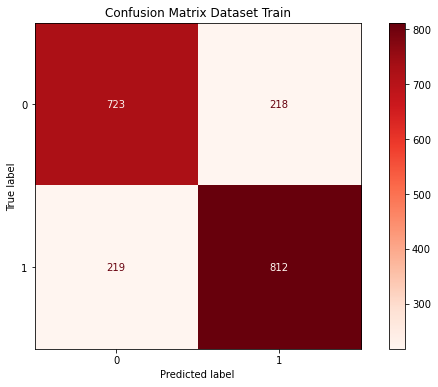

In [134]:
matrix=plot_confusion_matrix(Model_final_clf,XRr_train,yRr_train, cmap=plt.cm.Reds)
matrix.ax_.set_title("Confusion Matrix Dataset Train")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.gcf().set_size_inches(10,6)
plt.show()

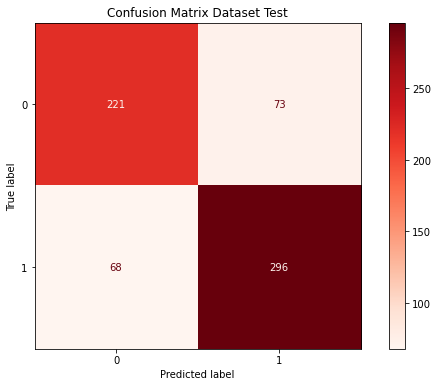

In [135]:
matrix=plot_confusion_matrix(Model_final_clf,XRr_test,yRr_test, cmap=plt.cm.Reds)
matrix.ax_.set_title("Confusion Matrix Dataset Test")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.gcf().set_size_inches(10,6)
plt.show()

En las distitas matrices de confusion se ve que lo errores en clasificacion son menores ya que la mayoria estan bien clasificados.

**Ahora predeciremos la politica de tres paises que el modelo nunca vio y concluiremos si sirve o no o si parcialmente sirve y habria que hacer mayores modificaciones las cuales quedarian como preguntas a implementar en un futuro.**

**Para determinar si un pais hizo o no cuarentena nacional la mayoria de las etiqueteas predicar tiene que ser 0 (cero).**

## **Brasil**

**Sabemos que Brasil NO hizo cuarentena Nacional obligatoria, por lo que la prediccion no tendria que dar 1 en su mayoria.**

In [136]:
DataS_BR=DSet_paises_Analisis[DSet_paises_Analisis.location=="Brazil"]

Preparamos los datos.

In [137]:
DataS_BR["Aument_BajaRR"] = DataS_BR["new_deaths_per_100Thousand"].map(rango_Aumen_BajaRR)

In [138]:
print(DataS_BR.shape)
DataS_BR.head(2)

(270, 11)


,date,location,reproduction_rate,people_vaccinated,stringency_index,population_per_100Thousand,total_cases_per_100Thousand,new_cases_per_100Thousand,new_deaths_per_100Thousand,population_density_per_100Thousand,Aument_BajaRR
2659,2020-03-19,Brazil,2.48,NaN,66.2,2139.93441,0.290196,0.116359,0.001402,0.00025,0
2660,2020-03-20,Brazil,2.46,NaN,66.2,2139.93441,0.370572,0.080376,0.002337,0.00025,0


In [139]:
for col in DataS_BR.columns:
    nulos=DataS_BR[col].isna().sum()
    print(col, "{:.2f}%".format(nulos*100/270))

date 0.00%
location 0.00%
reproduction_rate 0.00%
people_vaccinated 100.00%
stringency_index 0.00%
population_per_100Thousand 0.00%
total_cases_per_100Thousand 0.00%
new_cases_per_100Thousand 0.00%
new_deaths_per_100Thousand 0.00%
population_density_per_100Thousand 0.00%
Aument_BajaRR 0.00%


Vemos que en el 100% de los dias la medida tuvo exito.

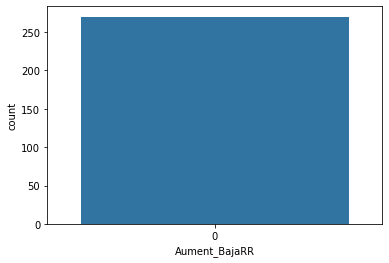

In [140]:
sns.countplot(x="Aument_BajaRR",data=DataS_BR)
plt.show()

In [141]:
X=DataS_BR[["stringency_index","population_density_per_100Thousand","population_per_100Thousand","reproduction_rate","Aument_BajaRR"]]

**Utilizamos el modelo y vemos que predice que Brasil no hizo cuarentena en un 100%. Lo cual es correcto.**

In [142]:
y_DS_BR_predic=Model_final_clf.predict(X)
y_DS_BR_predic

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

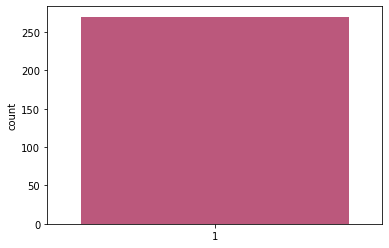

In [143]:
sns.countplot(x=y_DS_BR_predic,data=DataS_BR,palette="plasma")
plt.show()

## **Argentina**

**Sabemos que Argentina  hizo cuarentena Nacional obligatoria, por lo que la prediccion nos tendria que dar 0 en su mayoria.**

In [144]:
DataS_AR=DSet_paises_Analisis[DSet_paises_Analisis.location=="Argentina"]

Preparamos los datos.

In [145]:
DataS_AR["Aument_BajaRR"] = DataS_AR["new_deaths_per_100Thousand"].map(rango_Aumen_BajaRR)

In [146]:
print(DataS_AR.shape)
DataS_AR.head(2)

(269, 11)


,date,location,reproduction_rate,people_vaccinated,stringency_index,population_per_100Thousand,total_cases_per_100Thousand,new_cases_per_100Thousand,new_deaths_per_100Thousand,population_density_per_100Thousand,Aument_BajaRR
2929,2020-03-20,Argentina,0.0,NaN,88.89,456.05823,0.280666,0.067974,0.000000,0.000162,0
2930,2020-03-21,Argentina,2.2,NaN,88.89,456.05823,0.346447,0.065781,0.002193,0.000162,0


In [147]:
for col in DataS_AR.columns:
    nulos=DataS_AR[col].isna().sum()
    print(col, "{:.2f}%".format(nulos*100/269))

date 0.00%
location 0.00%
reproduction_rate 0.00%
people_vaccinated 100.00%
stringency_index 0.00%
population_per_100Thousand 0.00%
total_cases_per_100Thousand 0.00%
new_cases_per_100Thousand 0.00%
new_deaths_per_100Thousand 0.00%
population_density_per_100Thousand 0.00%
Aument_BajaRR 0.00%


Aqui vemos que la cuarentena fue efectiva.

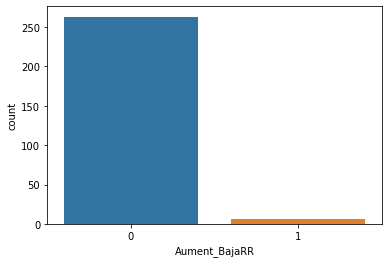

In [148]:
sns.countplot(x="Aument_BajaRR",data=DataS_AR)
plt.show()

In [149]:
X=DataS_AR[["stringency_index","population_density_per_100Thousand","population_per_100Thousand","reproduction_rate","Aument_BajaRR"]]

Utilizamos el modelo y vemos que predice que Argentina no hizo cuarentena nacional ya que tiene una probabilidad de haber hecho cuarentena nacional del 47% y un 53% de no haberla hecho. 
En este caso de la Argentina el modelo esta mas cerca de no saber que de clasificar bien o mal.

En este caso se no logro clasificar correctamente pero esto se puede deber a otros factores o a que el modelo no cuenta con la cantidad de informacino (instancias) o variables predictoras suficientes para clasificar.

In [150]:
y_DS_AR_predic=Model_final_clf.predict(X)
y_DS_AR_predic

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=int64)

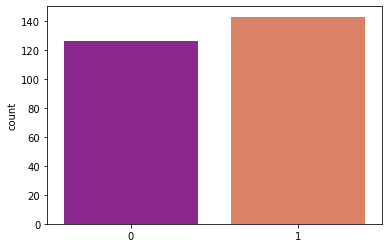

In [151]:
sns.countplot(x=y_DS_AR_predic,data=DataS_AR,palette="plasma")
plt.show()

## **Croacia**

**Sabemos que Croacia hizo cuarentena Nacional obligatoria, por lo que la prediccion no tendria que dar 0 en su mayoria.**

In [152]:
DataS_CR=DSet_paises_Analisis[DSet_paises_Analisis.location=="Croatia"]

Preparamos los datos.

In [153]:
DataS_CR["Aument_BajaRR"] = DataS_CR["new_deaths_per_100Thousand"].map(rango_Aumen_BajaRR)

In [154]:
print(DataS_CR.shape)
DataS_CR.head(2)

(271, 11)


,date,location,reproduction_rate,people_vaccinated,stringency_index,population_per_100Thousand,total_cases_per_100Thousand,new_cases_per_100Thousand,new_deaths_per_100Thousand,population_density_per_100Thousand,Aument_BajaRR
3198,2020-03-18,Croatia,0.0,NaN,44.44,40.81657,1.984488,0.391998,0.0000,0.000737,0
3199,2020-03-19,Croatia,0.0,NaN,50.00,40.81657,2.572485,0.587996,0.0245,0.000737,0


In [155]:
for col in DataS_CR.columns:
    nulos=DataS_CR[col].isna().sum()
    print(col, "{:.2f}%".format(nulos*100/271))

date 0.00%
location 0.00%
reproduction_rate 0.00%
people_vaccinated 100.00%
stringency_index 0.00%
population_per_100Thousand 0.00%
total_cases_per_100Thousand 0.00%
new_cases_per_100Thousand 0.00%
new_deaths_per_100Thousand 0.00%
population_density_per_100Thousand 0.00%
Aument_BajaRR 0.00%


Aqui vemos que la cuarentena fue efectiva.

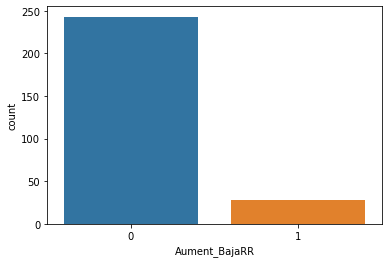

In [156]:
sns.countplot(x="Aument_BajaRR",data=DataS_CR)
plt.show()

In [157]:
X=DataS_CR[["stringency_index","population_density_per_100Thousand","population_per_100Thousand","reproduction_rate","Aument_BajaRR"]]

Utilizamos el modelo y vemos que predice que Croacia no hizo cuarentena nacional ya que tiene una probabilidad de haber hecho cuarentena nacional del 40% y un 60% de no haberla hecho.

En este caso se no logro clasificar correctamente pero esto se puede deber a otros factores o a que el modelo no cuenta con la cantidad de informacino (instancias) o variables predictoras suficientes para clasificar.

In [158]:
y_DS_CR_predic=Model_final_clf.predict(X)
y_DS_CR_predic

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

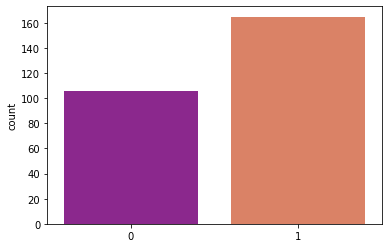

In [159]:
sns.countplot(x=y_DS_CR_predic,data=DataS_CR,palette="plasma")
plt.show()

## **Conclusion**

Concluimos que el mejor modelo desarrollado fue el regresion logistica que se basaba en la variable predictora "Reproduction Rate" esta fue la que mayor accuracy arrojo y luego de optimizar sus hiperparametros llego a un 78% de accuracy.

Tambien concluimos que el indicador mas relevante y certero es el "Reproduction Rate" ya que es el unico que nos dice con certeza si la expansion del virus se esta frenando o no porque los nuevos casos tiene muchos baches en su determinacion como por ejemplo la falta de testeos o los pocos testeos que hace cada pais y en relacion a las nuevas muertes es posible errores de carga de datos y se podrian cargar muerte por covid y en realidad son muertes por otras causas a demas de que no todos los contagiados son hospitalizado y no todos los hopitalizados mueren.

En relacion a los modelos, concluimos que es posible hacer un clasificador a partir de una regresion logistica pero aunque como pudimos ver en las pruebas con lo tres paise nunca visto por el modelo, no logra clasificar correctamente, creemos que al agregar mas paises de distintas regiones del mundo,respetando la politica seleccionada y agregando mas variables predictoras se podria hacer un clasificador que nos diga que politica implemento cada pais por si datos.

Pero si lo que no podriamos hacer en predecir el futuro comportamiento del virus ni la efectividad anticipada de nuevas politicas publicas.

## ¿Qué preguntas nacen del trabajo ya realizado?

Sera posible predecir zonas del mundo o paises donde el virus cambien en una nueva variante en relacion a contagios y la falta de politicas publicas de salud eficientes.

Ya que en inglaterra surguio una variante en argentina otra y en africa otra, teniendo en cuenta que estos paises son muy distintos entre si como tambien sus politicas, sociedades, climas y economias.